In [1]:
#Generating strips of image through centroid
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from PIL import Image
import scipy
import math

Using TensorFlow backend.
/home/rahulsuresh/python-environments/env/lib/python3.5/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (2.3.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [38]:
def plot_grid(data2,grid):
    for i in range(1, grid*grid+1):
        plt.subplot(grid, grid, i)
        plt.imshow(data2[i-1],'gray')
        plt.xticks([])
        plt.yticks([])
        plt.suptitle('Preprocessed Image', y=1.05, fontsize=24)

def get_centroids(grid,individual_height,individual_width):
    centroids=[]
    h_sum=0
    for i in range(0,grid):
        w_sum=0
        for j in range(0,grid):
            centroids.append([individual_height/2+h_sum,individual_width/2+w_sum])
            w_sum+=individual_width
        h_sum+=individual_height
    centroids=np.array(centroids)
    return centroids

def difference_between(a,b):
    return abs(a-b)

def get_slices(image,centroids,individual_height,individual_width,orig_height,orig_width):
    data2=[]
#     print('before individual_height',individual_height)
#     print('before individual_width',individual_width)
    
    individual_height=int(individual_height)
    individual_width=int(individual_width)
    
#     print('after individual_height',individual_height)
#     print('after individual_width',individual_width)
    
#     print()
#     print('orig_height',orig_height)
#     print('orig_width',orig_width)
    for centroid in centroids:
        centroid[0]=int(centroid[0])
        centroid[1]=int(centroid[1])
        
#         print("height",centroid[0],"width",centroid[1])
#         print()
        
        crop=np.zeros((individual_height,individual_width))
                
        crop_lower_height=0
        crop_upper_height=individual_height
        crop_lower_width=0
        crop_upper_width=individual_width
        lower_height=int(centroid[0]-individual_height/2)
        upper_height=int(centroid[0]+individual_height/2)
        lower_width=int(centroid[1]-individual_width/2)
        upper_width=int(centroid[1]+individual_width/2)
        
        #basically make sure crop_upper_width - crop_lower_width= upper_width - lower_width
        while (difference_between(crop_upper_width,crop_lower_width)!=difference_between(upper_width,lower_width)):
            crop_upper_width-=1
        
        big_image_lower_height=0
        big_image_upper_height=orig_height
        big_image_lower_width=0
        big_image_upper_width=orig_width
        
        
        if(lower_height<big_image_lower_height):
            crop_lower_height=difference_between(big_image_lower_height,lower_height)
            lower_height=big_image_lower_height
        
        if(upper_height>big_image_upper_height):
            crop_upper_height=individual_height-difference_between(big_image_upper_height,upper_height)
            upper_height=big_image_upper_height
        
        if(lower_width<big_image_lower_width):
            crop_lower_width=difference_between(big_image_lower_width,lower_width)
            lower_width=big_image_lower_width
        
        if(upper_width>big_image_upper_width):
            crop_upper_width=individual_width-difference_between(big_image_upper_width,upper_width)
            upper_width=big_image_upper_width
        
        
        crop[crop_lower_height:crop_upper_height,crop_lower_width:crop_upper_width]=image[lower_height:upper_height,lower_width:upper_width]
#         alternatively comment above statement and while loop
#         and uncomment below statements
#         size=difference_between(crop_lower_height,crop_upper_height),difference_between(crop_lower_width,crop_upper_width)
#         crop[crop_lower_height:crop_upper_height,crop_lower_width:crop_upper_width]=scipy.misc.imresize(image[lower_height:upper_height,lower_width:upper_width],size)
        data2.append(crop)
    return np.array(data2)


In [3]:
img = Image.open('pricelabel1.jpg' )
img.load()
img = img.convert('1')
data = np.asarray( img, dtype="int32" )

In [4]:
data.shape

(3000, 4000)

Text(0.5, 1.0, 'Input Image')

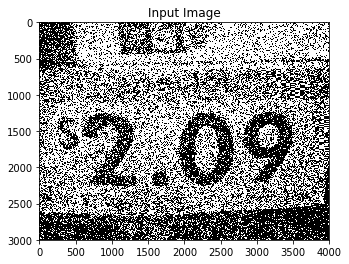

In [5]:
plt.imshow(data,'gray')
plt.title("Input Image")

In [6]:
orig_height, orig_width=data.shape

In [40]:
grid=3

In [41]:
#resize image before passing it
# size=(orig_height//grid)*grid,(orig_width//grid)*grid
# data=scipy.misc.imresize(data,size)
# orig_height, orig_width=data.shape
# orig_width
#display centroids
# for centroid in centroids:
#     print("height",centroid[0],"width",centroid[1])
#     print()
  

In [42]:
#get centroid of each image
#num,individual_height,individual_width=data2.shape
individual_height=orig_height//grid
individual_width=orig_width//grid

In [43]:
print('individual_height',individual_height)
print('individual_width',individual_width)

individual_height 1000
individual_width 1333


In [44]:
centroids=get_centroids(grid,individual_height,individual_width)
centroids.shape

(9, 2)

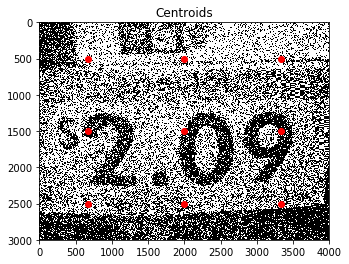

In [45]:
#visualize centroids
plt.imshow(data,'gray')
plt.title("Centroids")
for centroid in centroids:
    plt.plot(centroid[1], centroid[0], 'ro')

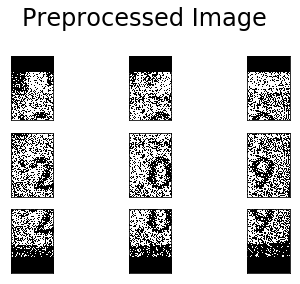

In [39]:
#can fill empty space with either wrap around or zeros
#image,centroids,individual_height,individual_width,orig_height,orig_width
data2=get_slices(data,centroids,individual_height*2,individual_width,orig_height,orig_width)
plot_grid(data2,grid)

Can display which part of original image is shown - like mask rcnn